# Regresja

In [159]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
cleaned_data = pd.read_excel('clean_data_relevant.xlsx')

In [160]:
from sklearn.model_selection import train_test_split

X = cleaned_data.drop(columns='PRICE')
y = cleaned_data['PRICE']
y = np.round(y, decimals=-2) #przy cenach posiadłości część nie ma aż tak dużo znaczenia znaczenia. Zakładając że ostatnie 2 miejsca wynoszą 99 to nawet dla minimalnej wartości w zbiorze danych stonowi to jedynie 0.2%

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
trained_models = []

## Modele

### Linear Model - model podstawowy

In [162]:
from sklearn.linear_model import LinearRegression, HuberRegressor

reg = LinearRegression().fit(X_train, y_train)

print('Współczynniki: ',reg.coef_)
print('Wyraz wolny', reg.intercept_)

y_pred = reg.predict(X_test)

Współczynniki:  [-2.62672801e+01  4.24833137e+01  1.06270999e+06  4.69913920e+05
 -6.05035909e+04 -3.92182138e+05  2.54220326e+03 -2.47246065e+06
 -1.27279156e+04  9.00826084e+06  8.25126901e+06]
Wyraz wolny -556931.6181059673


In [163]:
cv_score = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 20)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Linear Model', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 2607779.1296
R2: 0.3508
Cross Validated R2:  [0.3459, 0.1563, 0.5221, 0.4182, 0.3481, 0.2682, 0.0582, 0.1891, 0.5465, 0.2921, 0.1511, 0.4439, 0.0411, 0.2398, 0.4886, 0.5675, 0.4712, 0.5468, -0.0858, 0.2289]
Mean Cross Validated R2:  0.3119
Min Cross Validated R2:  -0.0858
Max Cross Validated R2:  0.5675


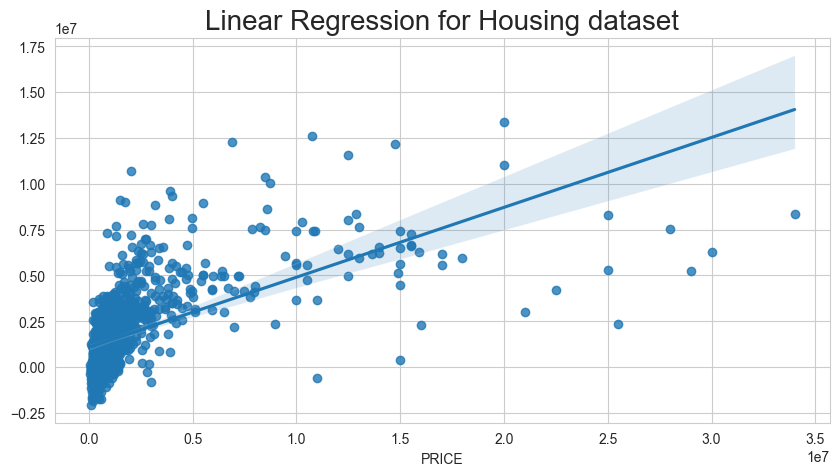

In [164]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear Regression for Housing dataset', fontsize = 20)
plt.show()

### Forest Regressor

In [166]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

cv_score = cross_val_score(estimator = forest_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = forest_reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Forest Regressor Model = 10 trees', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 1933981.2935
R2: 0.6429
Cross Validated R2:  [0.7717, 0.142, 0.7, 0.5664, 0.7383, 0.4081, 0.3587, 0.2929, 0.8635, 0.5026, 0.1323, 0.3841, 0.2727, 0.4956, 0.6111, 0.7267, 0.8458, 0.5858, -0.8756, 0.3692]
Mean Cross Validated R2:  0.4446
Min Cross Validated R2:  -0.8756
Max Cross Validated R2:  0.8635


In [168]:
from sklearn.ensemble import RandomForestRegressor

forest_reg_30 = RandomForestRegressor(n_estimators = 30, random_state = 0)
forest_reg_30.fit(X_train, y_train)
y_pred = forest_reg_30.predict(X_test)

cv_score = cross_val_score(estimator = forest_reg_30, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = forest_reg_30.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Forest Regressor Model = 30 trees', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 1828813.7087
R2: 0.6807
Cross Validated R2:  [0.7664, 0.1912, 0.8026, 0.5119, 0.6113, 0.4498, 0.4777, 0.3762, 0.88, 0.4495, 0.3251, 0.369, 0.2007, 0.4833, 0.7564, 0.749, 0.832, 0.6116, 0.3611, 0.4542]
Mean Cross Validated R2:  0.533
Min Cross Validated R2:  0.1912
Max Cross Validated R2:  0.88


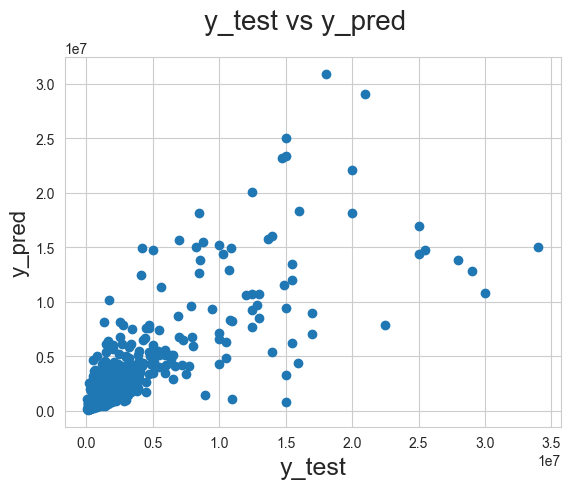

In [167]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### Decision Tree

In [169]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

cv_score = cross_val_score(estimator = tree_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = tree_reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Decision Tree', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


RMSE: 3365734.0893
R2: -0.0815
Cross Validated R2:  [0.7824, -1.065, -0.3246, 0.4149, -0.792, -0.3482, -0.3064, 0.1717, 0.766, 0.012, 0.0915, -0.2379, -0.2897, 0.3597, 0.7412, -0.2952, 0.7143, 0.1271, -0.7561, 0.1181]
Mean Cross Validated R2:  -0.0058
Min Cross Validated R2:  -1.065
Max Cross Validated R2:  0.7824


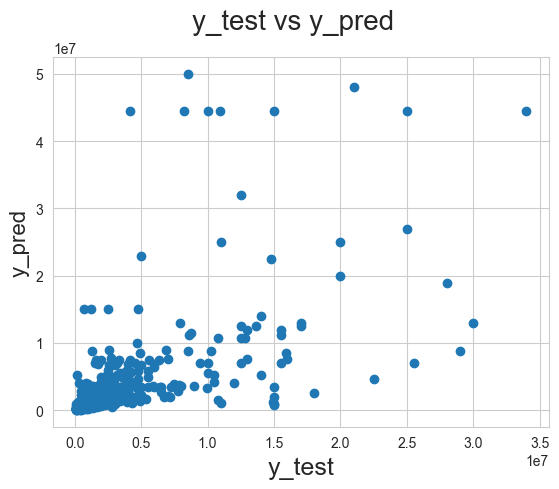

In [170]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=3, solver="cholesky")
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

cv_score = cross_val_score(estimator = ridge_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = ridge_reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Ridge Model', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])


In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)             
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)      
plt.show()

### XGBoost

In [171]:
from xgboost import XGBRegressor

XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)
XGBR.fit(X_train, y_train)
y_pred = XGBR.predict(X_test)

cv_score = cross_val_score(estimator = XGBR, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = XGBR.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['XGBRegressor', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

RMSE: 1878028.7785
R2: 0.6633
Cross Validated R2:  [0.7852, 0.1032, 0.6284, 0.739, 0.6953, 0.4056, 0.4129, 0.4415, 0.905, 0.6032, 0.5833, -0.0394, 0.4404, 0.6001, 0.6406, 0.7756, 0.8363, 0.6969, 0.5784, 0.4884]
Mean Cross Validated R2:  0.566
Min Cross Validated R2:  -0.0394
Max Cross Validated R2:  0.905


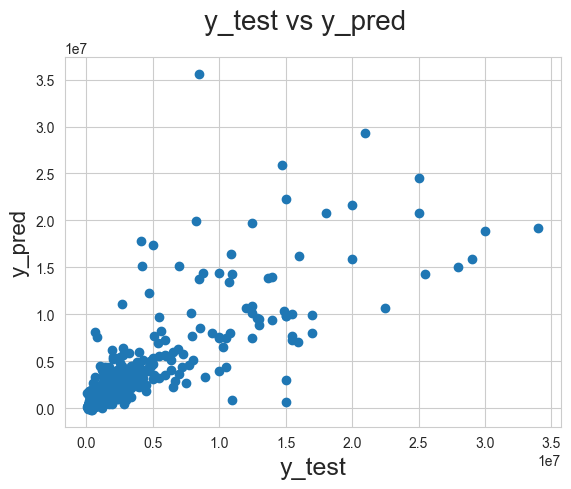

In [172]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

cv_score = cross_val_score(estimator = log_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = log_reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Logistic Regression', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Logistic Regression', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### SVC

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC(probability=True)
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

cv_score = cross_val_score(estimator = svc_clf, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = svc_clf.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['SVC', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('SVC', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVC
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)

cv_score = cross_val_score(estimator = bayesian_reg, X = X_train, y = y_train, cv = 20)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = bayesian_reg.score(X_test, y_test)

print('RMSE:', round(RMSE,4))
print('R2:', round(R2,4))
print("Cross Validated R2: ", list(map(lambda x: round(x,4) ,cv_score)))
print("Mean Cross Validated R2: ", round(cv_score.mean(),4) )
print("Min Cross Validated R2: ", round(cv_score.min(),4) )
print("Max Cross Validated R2: ", round(cv_score.max(),4) )
trained_models.append(['Bayesian Reg', round(RMSE,2) , round(R2,4), round(cv_score.mean(),4), round(cv_score.min(),4), round(cv_score.max(),4), list(map(lambda x: round(x,4) ,cv_score)) ])

### Bayesian regression

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Bayesian Ridge', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

## Podsumowanie Regresji

In [173]:
trained_models = pd.DataFrame( trained_models, columns=['Model','RMSE','R2 Score','Mean Cross Validated R2 Score','Min Cross Validated R2 Score','Max Cross Validated R2 Score','Cross Validated R2 Scores'])
trained_models

,Model,RMSE,R2 Score,Mean Cross Validated R2 Score,Min Cross Validated R2 Score,Max Cross Validated R2 Score,Cross Validated R2 Scores
0,Linear Model,2607779.13,0.3508,0.3119,-0.0858,0.5675,"[0.3459, 0.1563, 0.5221, 0.4182, 0.3481, 0.268..."
1,Forest Regressor Model = 10 trees,1933981.29,0.6429,0.4446,-0.8756,0.8635,"[0.7717, 0.142, 0.7, 0.5664, 0.7383, 0.4081, 0..."
2,Forest Regressor Model = 30 trees,1828813.71,0.6807,0.5330,0.1912,0.8800,"[0.7664, 0.1912, 0.8026, 0.5119, 0.6113, 0.449..."
3,Decision Tree,3365734.09,-0.0815,-0.0058,-1.0650,0.7824,"[0.7824, -1.065, -0.3246, 0.4149, -0.792, -0.3..."
4,XGBRegressor,1878028.78,0.6633,0.5660,-0.0394,0.9050,"[0.7852, 0.1032, 0.6284, 0.739, 0.6953, 0.4056..."


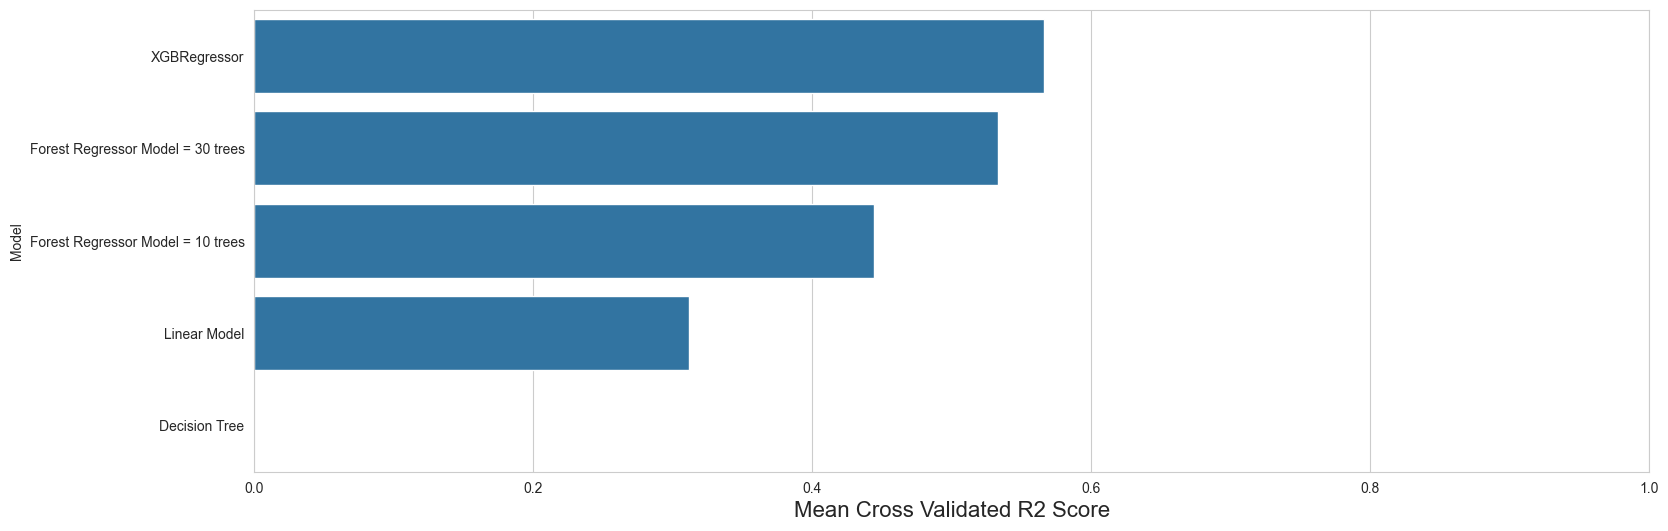

In [174]:
f, axe = plt.subplots(1,1, figsize=(18,6))

trained_models.sort_values(by=['Mean Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Mean Cross Validated R2 Score', y='Model', data = trained_models, ax = axe)
axe.set_xlabel('Mean Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)

plt.show()

# Klasyfikacja cen

Dzielimy zbiór danych na 5 przedziałów, aby móc przewidzieć etykiety zamiast wartości ciągłych.

In [154]:
import pandas as pd
X = cleaned_data.drop(columns='PRICE')
y = cleaned_data['PRICE']
y = np.round(y, decimals=-2) #przy cenach posiadłości część nie ma aż tak dużo znaczenia znaczenia. Zakładając że ostatnie 2 miejsca wynoszą 99 to nawet dla minimalnej wartości w zbiorze danych stonowi to jedynie 0.2%

sorted_prices = y.sort_values()

categories = pd.qcut(sorted_prices, q=3, labels=[ 'Low',  'Medium', 'High'])

category_ranges = {}
for category in categories.cat.categories:
    min_val = sorted_prices[categories == category].min()
    max_val = sorted_prices[categories == category].max()
    category_ranges[category] = (min_val, max_val)

print("Wartości dla każdego przedziału:")
for category, (min_val, max_val) in category_ranges.items():
    print(f"{category}: {min_val} - {max_val}")

Wartości dla każdego przedziału:
Low: 49500 - 599000
Medium: 599900 - 1175000
High: 1180000 - 60000000


In [155]:
y =  y.apply(lambda x: 0 if x < 599000 else (1 if x < 1100000 else (2 if x < 2500000 else 3)))

print(y.value_counts())

PRICE
0    1477
1    1440
2     998
3     591
Name: count, dtype: int64


In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
trained_models = []

## Modele Klasyfikacji

### DecisionTreeClassifier

In [157]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini',  random_state=0)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_gini)
class_report = classification_report(y_test, y_pred_gini)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[324  96  14   2]
 [ 80 261  89  14]
 [ 18  82 160  34]
 [  2   8  38 130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       436
           1       0.58      0.59      0.59       444
           2       0.53      0.54      0.54       294
           3       0.72      0.73      0.73       178

    accuracy                           0.65      1352
   macro avg       0.65      0.65      0.65      1352
weighted avg       0.65      0.65      0.65      1352


### Forest Classifier

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Instantiate the Random Forest Classifier
clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train, y_train)
y_pred_forest = clf_forest.predict(X_test)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
class_report_forest = classification_report(y_test, y_pred_forest)

print("Confusion Matrix (Random Forest Classifier):")
print(conf_matrix_forest)
print("\nClassification Report (Random Forest Classifier):")
print(class_report_forest)


Confusion Matrix (Random Forest Classifier):
[[348  83   5   0]
 [ 62 321  58   3]
 [ 11  76 176  31]
 [  2   2  38 136]]

Classification Report (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       436
           1       0.67      0.72      0.69       444
           2       0.64      0.60      0.62       294
           3       0.80      0.76      0.78       178

    accuracy                           0.73      1352
   macro avg       0.73      0.72      0.73      1352
weighted avg       0.73      0.73      0.73      1352


## Podsumowanie Klasyfikacji

In [181]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_gini)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_pred_forest)
auc_tree = roc_auc_score(y_test, y_pred_gini)
auc_forest = roc_auc_score(y_test, y_pred_forest)

plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.plot(fpr_forest, tpr_forest, label=f'Random Forest (AUC = {auc_forest:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

ValueError: multiclass format is not supported